# K Means Clustering

For this project, I will attempt to use K-Means Clustering to cluster Universities into two groups, Private and Public.

___
It is **very important to note, I actually have the labels for this data set, but I will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case, we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project don't truly make sense in a real-world setting!.
___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Set up

### Import needed libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Get the data

In [64]:
df = pd.read_csv('College_Data',index_col=0)

In [65]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [67]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Exploratory Data Analysis

First, I will create a scatter plot showing the relationship between Grad.Rate and Room.Board, segregating the data by color based on the known grouping ('Private')

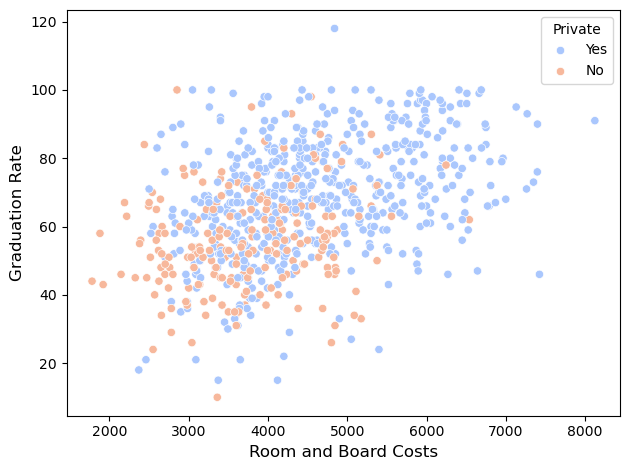

In [68]:
sns.scatterplot(x = 'Room.Board', 
                y = 'Grad.Rate', 
                hue = 'Private',
                data = df,
                palette = 'coolwarm')
plt.ylabel('Graduation Rate', fontsize=12)
plt.xlabel('Room and Board Costs', fontsize=12)
plt.tight_layout()

The plot shows the relationship between Room and Board Costs and Graduation Rate for U.S. colleges, distinguishing private (blue) and public (orange) institutions. There is a mild positive trend—schools with higher living costs tend to have higher graduation rates overall. The two groups exhibit partial overlap, but a clear tendency emerges: public universities are more concentrated at the lower end of both cost and graduation rate, whereas private universities dominate the upper-right region, indicating generally higher expenses and outcomes. The clustering is not perfectly distinct, suggesting shared characteristics across institution types. Notably, there is an outlier private college reporting a graduation rate above 100%, which likely reflects a data error or an exceptional reporting case worth further investigation.

Next, I will explore the relationship between F.Undergrad and Outstate. Again, segregated by the known grouping factor.

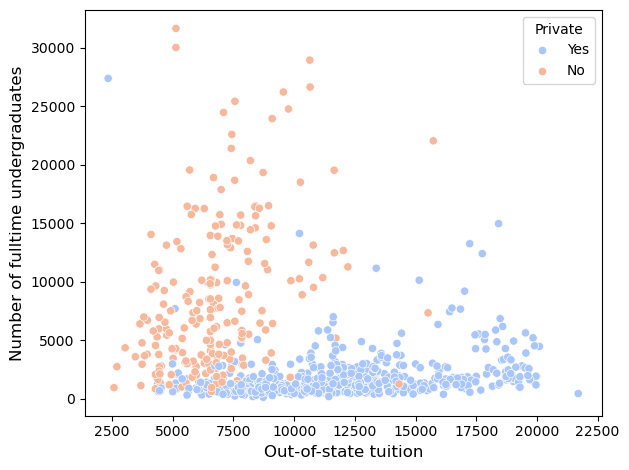

In [69]:
sns.scatterplot(x = 'Outstate', 
                y = 'F.Undergrad', 
                hue = 'Private',
                data = df,
                palette = 'coolwarm')
plt.ylabel('Number of fulltime undergraduates', fontsize=12)
plt.xlabel('Out-of-state tuition', fontsize=12)
plt.tight_layout()

This plot highlights a much clearer separation between private and public universities when examining Out-of-State Tuition versus the Number of Full-Time Undergraduates. Public universities (orange) tend to have larger student populations and lower tuition fees, forming a dense cluster in the lower-tuition, high-enrollment region of the plot. In contrast, private universities (blue) generally have smaller enrollments and higher tuition costs, occupying the opposite region. While some overlap occurs among institutions with lower tuition and smaller student bodies, the overall distinction between the two groups is pronounced, illustrating how institutional type strongly relates to both tuition structure and student population size.

Next, I will explore the distribution of Out of State Tuition based on the Private column to explore these patterns further.

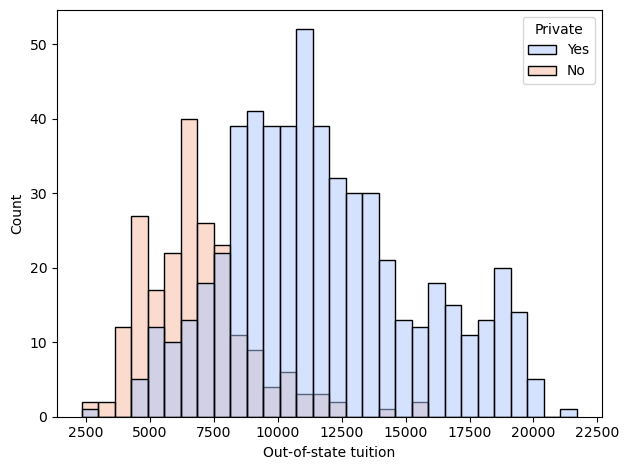

In [70]:
sns.histplot(x = 'Outstate', 
             hue = 'Private', 
             data = df,
            multiple = 'layer',
            alpha = 0.5, 
             bins = 30,
            palette = 'coolwarm')
plt.xlabel('Out-of-state tuition')
plt.tight_layout()

This histogram provides a clear view of how Out-of-State Tuition is distributed across private (blue) and public (orange) universities. It reinforces the pattern observed in the previous scatterplot: public institutions are concentrated in the lower tuition range, typically below 8,000 dollars, while private universities dominate the higher tuition brackets, often exceeding 10,000 dollars. The overlap in the mid-range suggests that a subset of private colleges maintains relatively moderate tuition fees, but overall, the distinction between the two groups is evident. This visualisation effectively illustrates the strong role of tuition structure in differentiating institution types within the dataset.

Let's go back to the graduation rate outlier and explore it a bit further.

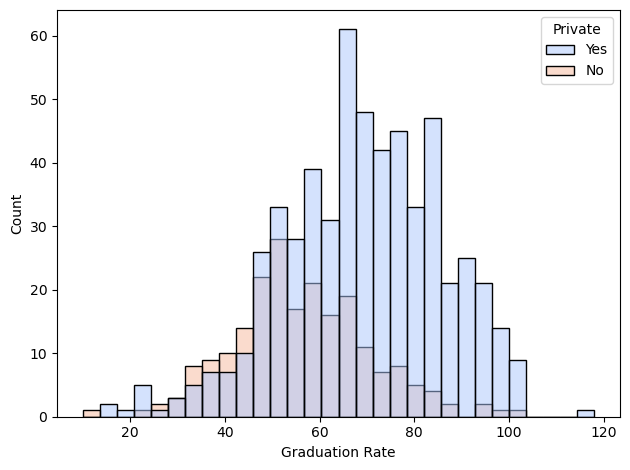

In [71]:
sns.histplot(x = 'Grad.Rate', 
             hue = 'Private', 
             data = df,
            multiple = 'layer',
            alpha = 0.5, 
             bins = 30,
            palette = 'coolwarm')
plt.xlabel('Graduation Rate')
plt.tight_layout()

In [73]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


This must be an error and that point should be 100% (cannot have more than 100% student graduate). Let's adjust that.

In [87]:
df.loc[df['Grad.Rate'] >100, 'Grad.Rate'] = 100 
#.loc[row, column] - This is the pandas method used for label-based selection and assignment

In [75]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


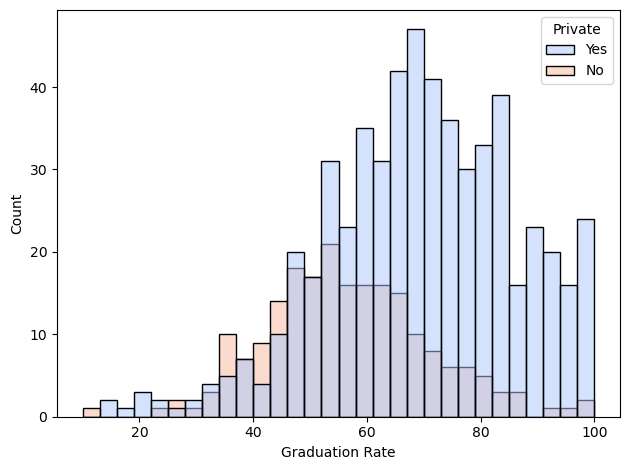

In [76]:
sns.histplot(x = 'Grad.Rate', 
             hue = 'Private', 
             data = df,
            multiple = 'layer',
            alpha = 0.5, bins = 30,
            palette = 'coolwarm')
plt.xlabel('Graduation Rate')
plt.tight_layout()

That looks much better!

## K Means Cluster Creation

In [80]:
from sklearn.cluster import KMeans

In [81]:
kmeans = KMeans(n_clusters=2)

In [82]:
kmeans.fit(df.drop('Private', axis = 1))

KMeans(n_clusters=2)

In [83]:
kmeans.cluster_centers_

array([[1.94782101e+03, 1.31368639e+03, 4.86974852e+02, 2.67500000e+01,
        5.45857988e+01, 2.11855178e+03, 5.43665680e+02, 1.07181509e+04,
        4.37916420e+03, 5.44346154e+02, 1.26384320e+03, 7.10266272e+01,
        7.82988166e+01, 1.37792899e+01, 2.37071006e+01, 9.61601627e+03,
        6.59896450e+01, 8.18047337e-01],
       [1.00549109e+04, 6.73820792e+03, 2.74102970e+03, 3.29702970e+01,
        6.39009901e+01, 1.42840297e+04, 2.94107921e+03, 8.58346535e+03,
        4.21270297e+03, 5.83079208e+02, 1.85466337e+03, 8.35940594e+01,
        8.90990099e+01, 1.61673267e+01, 1.62970297e+01, 9.95570297e+03,
        6.17623762e+01, 1.18811881e-01]])

### Evaluation
There is no perfect way to evaluate clustering if you don't have the labels. However, since this is just an exercise, I do have the labels, soI will take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

I'd need to transform the cluster from Yes/No to 1/0

In [84]:
df['Cluster'] = df['Private'].map({'Yes': 1, 'No': 0})

In [85]:
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1


Create the traditional confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
print('=======================================')
print('Model evaluation for K Means Clustering')
print('=======================================')
print('\n')
print('Confusion matrix')
print('----------------')
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print('\n')
print('Classification report')
print('---------------------')
print(classification_report(df['Cluster'],kmeans.labels_))

Model evaluation for K Means Clustering


Confusion matrix
----------------
[[123  89]
 [553  12]]


Classification report
---------------------
              precision    recall  f1-score   support

           0       0.18      0.58      0.28       212
           1       0.12      0.02      0.04       565

    accuracy                           0.17       777
   macro avg       0.15      0.30      0.16       777
weighted avg       0.14      0.17      0.10       777



The K-Means clustering results show very weak alignment with the true class labels, as reflected by the confusion matrix and low evaluation metrics (accuracy = 0.17, macro F1 = 0.16). Although the algorithm created two clusters, these do not correspond meaningfully to the “Private” vs. “Public” categories: one cluster captures only a portion of one class, while the other fails to separate the remainder. This is expected, since K-Means is an unsupervised method that groups points based on similarity in feature space rather than on labeled categories. The outcome suggests that the chosen features do not exhibit clear Euclidean separation between the true classes, indicating either overlapping distributions or that other latent patterns dominate the data structure. In short, the model identifies internal structure in the dataset, but that structure is not related to the real-world class distinction.

# --- End of the project! ---